# Linear Regression


## The scikit-learn machine learning library

[Scikit-learn](https://scikit-learn.org/stable/) is a freeware machine learning library for Python. It features various classification, regression and clustering algorithms, accompanied by the most widespread data management techniques. It also includes a variety of data processing tools and contains an experimental collection of toy and benchmark datasets. It is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

Scikit-learn integrates well with many other Python libraries, such as Matplotlib for plotting, NumPy for linear algebra operations, Pandas dataframes, SciPy, and many more. It gets installed automatically with Anaconda3.




X= [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
y= [1.88202617 1.3500786  1.78936899 2.5704466  2.533779   1.26136106
 2.37504421 1.9743214  2.14839057 2.55529925 2.57202179 3.37713675
 3.18051886 3.01083751 3.32193162 3.41683716 4.14703954 3.44742087
 3.85653385 3.42295213 2.72350509]


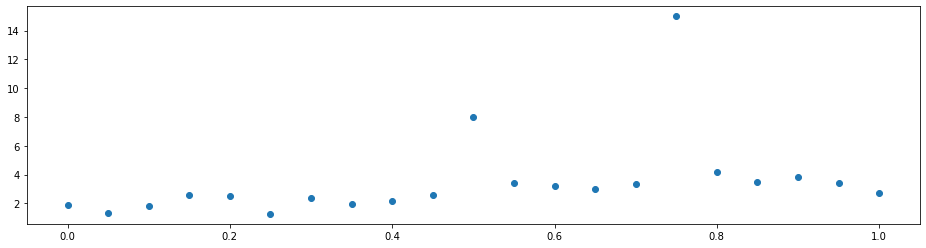

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Random number generator; we set it to a fixed number to get the same results the next time we execute this code block.
np.random.seed(0)

# Create a linear space in the range [0,1], then divide it evenly to 20 sub-ranges, and then, get the separating points.
X = np.linspace(0, 1, 21)
print("X=", X)

# A random linear function
y = 3*X + 1 + 0.5*np.random.randn(21)
print("y=", y)

# Reshape the values so that they occupy one column and an arbitrary number of rows (-1).
X = X.reshape(-1, 1)
#print("reshaped X=", X)

# Make some outliers by replacing some values of X with other, extreme values
y[10] = 8
y[15] = 15

# Create a plot
plt.figure(figsize=(16, 4))

# Plot X versus y: (X,y) is our training set
plt.scatter(X, y)


## Linear Regression with scikit-learn

The [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class is the scikit-learn's implementation of the ordinary least squares Linear Regression. The object may receive a number of parameters as shown in the official documentation. A small portion of them includes:

 - `fit_intercept`: Whether to calculate the intercept for this model. If set to `False`, no intercept will be used in calculations (that is, the data is expected to be centered).
 - `n_jobs`: The number of jobs to use for the computation. This will only provide speedup in case of sufficiently large problems.

* Moreover, the [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model supports a number of methods. The methods that are used here are:

 - `fit()`: fit (that is, train) the linear model.
 - `predict`: make predictions on the input variables of the test set by using the trained linear model.

* The following attributes of [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) provide valuable information about the parameters of the trained model:

 - `coef_`: Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit, this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features.
 - `intercept_`: Independent term in the linear model. Set to 0.0 if `fit_intercept = False`


test samples= [[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]
predictions= [1.7294359  2.62490824 3.52038057 4.41585291 5.31132525]


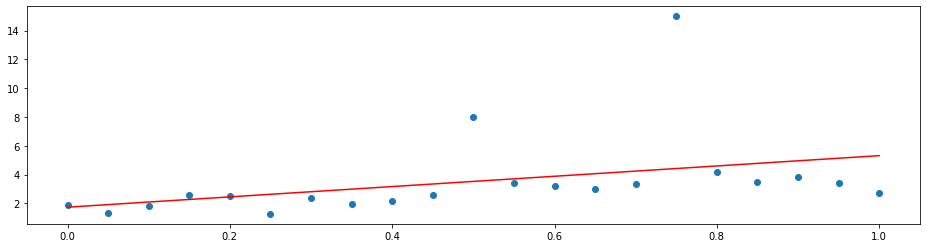

In [2]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
LR_model=LinearRegression()

# Train the model with X and y
LR_model.fit(X, y)

# Create some samples for testing
x = np.linspace(0, 1, 5).reshape(-1, 1)
print("test samples=", x)

# Now we use our trained LR_model to predict the values of the unknown samples x
pred_y = LR_model.predict(x)
print("predictions=", pred_y)

# Create a plot
plt.figure(figsize=(16, 4))

# Plot X versus y: (X,y) is our training set
plt.scatter(X, y)

# Plot the predicted values versus X: This red line ('r' argument) is learnt by the model.
plt.plot(x, pred_y, 'r')


This diagram demonstrates that the ordinary least squares is clearly affected by the outliers. The red line does not cross the points, especially after the second outlier is encountered (that is, after <code>X[15]</code>). That is because the mean squared error penalizes a few large errors more than many tiny errors.

By changing the loss function to the mean absolute deviation

$$\sum_i{|y_i-\hat{y_i}|}$$
we can let the model put the same focus on each error. This yields the least absolute deviation (LAD) regression that tries to agree with the majority of the points. To run this code you must install sklego. Open up the Anaconda Powershell Prompt and type this command:

<code>conda install -c conda-forge scikit-lego</code>

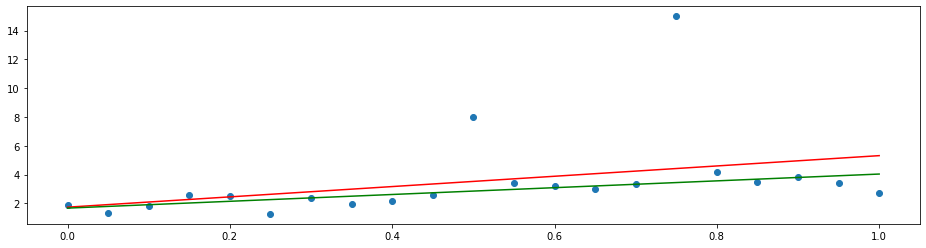

In [3]:
from sklego.linear_model import LADRegression

# Create a LAD Regression model
LAD_model=LADRegression()

# Train the model with X and y
LAD_model.fit(X, y)

# Use LAD_model to predict the values of the unknown samples x
lad_pred_y = LAD_model.predict(x)

plt.figure(figsize=(16, 4))

# Plot X versus y: (X,y) is our training set
plt.scatter(X, y)

# For Linear Regression: Plot the predicted values versus X: This red line ('r' argument) is learnt by the model.
plt.plot(x, pred_y, 'r')

# For LAD Regression: Plot the predicted values versus X: This green line ('g' argument) is learnt by the model.
plt.plot(x, LADRegression().fit(X, y).predict(x), 'g')


## The Boston dataset

Now let us experiment with a real-world dataset. The most convenient way of obtaining a dataset is through the `sklearn.datasets` module of scikit-learn. Here, we will employ the [Boston dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html), a collection of 506 houses located in Boston. Each house in the dataset is a sample that includes its price (namely, the target variable) and 13 features (also called input variables, or attributes). 

The following block of code imports the Boston dataset from scikit_learn into this notebook. More specifically, the [load_boston](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) function stores all the necessary data into an object named `dataset`.


In [4]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston
dataset = load_boston()


Let's look at the official description of the dataset. This description provides information on the number of samples (506) and their features (13).


In [5]:
# Display a description of the dataset: 8 features, 20640 samples.
print(dataset.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let us examine the names and the values of the input variables (features) of the dataset. We begin with the names:


In [6]:
# Display the names of the 80 features of the dataset.
print("Feature names:", dataset.feature_names)


Feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
# Display the values of the 8 features of the dataset (shape: 20640 x 8).
print(dataset.data)


[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


The values of the target variables (that is, the house prices) of the 20640 samples of the dataset are printed below. 

In [8]:
# Print the values of the target variables (i.e. the house prices)
print(dataset.target)


[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

## Linear Regression with a single input variable

We begin our analysis by choosing a subset of the features of the Boston dataset. At first, why don't we apply Linear Regression directly to all of them?

* For educational purposes: We desire to visualize the results and this is only possible with one or two features.
* For practical reasons: In large datasets with a large number of dimensions there is a risk of encountering the curse of dimensionality (not here).

Notice that the entire dataset will be fed to the Linear Regression model at the last part of this notebook. For the moment, we will create three independent subsets of the original input variables that reside in the `dataset.data` list. Each subset will include only one feature; the rest 12 features will be discarded. In  particular, we will experiment with `LSTAT`, `RM`, and `PTRATIO`, respectively. These three features have been deliberately selected after the application of feature selection techniques that will be demonstrated in future notebooks.


### Vizualizing the selected features

According to the description, `LSTAT` represents the percentage of the lower status of the population. Here is a scatter plot that depicts `LSTAT` as a function of house price `MEDV`.


In [9]:
# The target variables (MEDV)
Y = np.array(dataset.target)

# All the input variables (X.shape = 506 x 13)
X = np.array(dataset.data)

# A "randomly selected" feature: all rows of the column with index 12 (LSTAT)
X_LSTAT = np.array(dataset.data[:, 12:13])

# Another "randomly selected" feature: all rows of column index 5 (RM)
X_RM = np.array(dataset.data[:, 5:6])

# A third "randomly selected" feature: all rows of column index 10 (PTRATIO)
X_PTRATIO = np.array(dataset.data[:, 10:11])


Text(0, 0.5, 'MEDV')

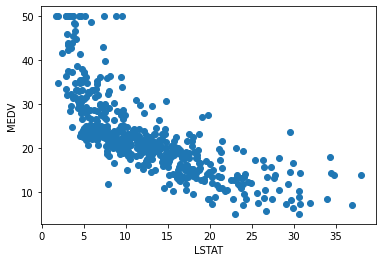

In [10]:
# Plot the LSTAT feature vs. the target variable (MEDV)
plt.scatter(X_LSTAT, Y, marker='o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')


In this case, the correlation of the selected feature and the target variable is obvious: the higher the `LSTAT` value of a sample is, the lower its target variable (i.e. price, `MEDV`) becomes.

Now let us examine visually  the correlation of another feature, `RM`, with the target variable `MEDV`. Recall that `RM` denotes the average number of rooms per dwelling.


Text(0, 0.5, 'MEDV')

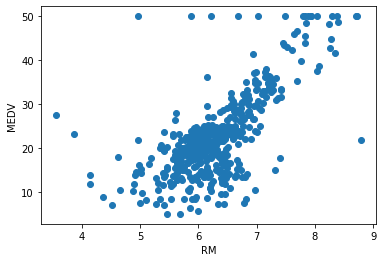

In [11]:
# Plot the RM feature vs. the target variable (MEDV)
plt.scatter(X_RM, Y, marker='o')
plt.xlabel('RM')
plt.ylabel('MEDV')


Similarly to `LSTAT`, there also seems to be a connection between the `RM` value of a sample and the target variable. However, here the target variable `MEDV` increases, as `RM` increases.

The last feature to visually inspect is `PTRATIO`, that is, the pupil-teacher ratio by town. In the following plot, we demonstrate the changes of `MEDV` with respect to `PTRATIO`.


Text(0, 0.5, 'MEDV')

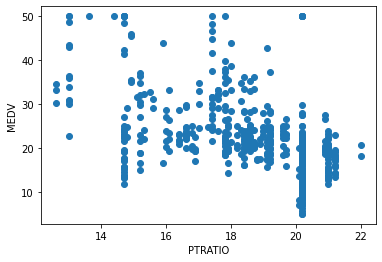

In [12]:
# Plot the PTRATIO feature vs. the target variable (MEDV)
plt.scatter(X_PTRATIO, Y, marker='o')
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')


Here the correlation begins to become more blurred. It seems very faintly that as `PTRATIO` increases, the house prices `MEDV` are starting to fall. However, there are many exceptions and the connection with `MEDV` is not so strong as in the previous two features.

### Training and testing the Linear Regression models

Let us now train 3 Linear Regression models. In the first, second, and third model the training set will contain only the `LSTAT`, `RM`, and `PTRATIO` features respectively. Of course, the training set will also include the target variables `MEDV`.

In the following code we employ several important methods and objects, including:

* [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html): This function will be studied in more details in future notebooks. For now, its arguments are: i) the original input variables, ii) the original target variables, and iii) the size of the test set as a percent of the original dataset. The output consists of 4 arrays: the input and target variables for training the model, and the input and target variables for testing the trained model.

In [13]:
# Train Linear Regression with LSTAT being the only feature.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the dataset into a training and a test set. The sizes of the test and
# training sets will be the 30% and 70% # of the original dataset, respectively.
X_LSTAT_TRAIN, X_LSTAT_TEST, Y_LSTAT_TRAIN, Y_LSTAT_TEST = train_test_split(X_LSTAT, Y, test_size=0.3, random_state=1)

# Create a Linear Regression model
LM_MODEL_LSTAT = LinearRegression()

# Train the model by using the training examples (input and target variables).
LM_MODEL_LSTAT.fit(X_LSTAT_TRAIN, Y_LSTAT_TRAIN)

# Test the model. PREDICTIONS_LSTAT contains the model's predictions (i.e.
# prices) on the unknown samples of the test set.
PREDICTIONS_LSTAT = LM_MODEL_LSTAT.predict(X_LSTAT_TEST)

# Evaluate the model by comparing the predicted house prices with the real ones.
# Compute the MSE and R-squared metrics.
MSE_LSTAT = mean_squared_error(Y_LSTAT_TEST, PREDICTIONS_LSTAT)
R2_LSTAT = LM_MODEL_LSTAT.score(X_LSTAT_TEST, Y_LSTAT_TEST)

print("Mean Squared Error: ", MSE_LSTAT)
print('R-squared: ', R2_LSTAT)

print("Predicted Prices: ", PREDICTIONS_LSTAT[0:6].reshape(1, -1))
print("Real Prices: ", Y_LSTAT_TEST[0:6].reshape(1, -1))


Mean Squared Error:  42.62024347153971
R-squared:  0.5349901044757204
Predicted Prices:  [[27.31914909 27.63999115 16.98803475 26.79663488 24.88074943 24.02822625]]
Real Prices:  [[28.2 23.9 16.6 22.  20.8 23. ]]


In [14]:
# Train Linear Regression with RM being the only feature.
X_RM_TRAIN, X_RM_TEST, Y_RM_TRAIN, Y_RM_TEST = train_test_split(X_RM, Y, test_size=0.3, random_state=1)

LM_MODEL_RM = LinearRegression()
LM_MODEL_RM.fit(X_RM_TRAIN, Y_RM_TRAIN)

PREDICTIONS_RM = LM_MODEL_RM.predict(X_RM_TEST)

MSE_RM = mean_squared_error(Y_RM_TEST, PREDICTIONS_RM)
R2_RM = LM_MODEL_RM.score(X_RM_TEST, Y_RM_TEST)

print("Mean Squared Error: ", MSE_RM)
print('R-squared: ', R2_RM)


Mean Squared Error:  36.517214730838624
R-squared:  0.6015774471545623


In [15]:
# Train Linear Regression with PTRATIO being the only feature.
X_PTRATIO_TRAIN, X_PTRATIO_TEST, Y_PTRATIO_TRAIN, Y_PTRATIO_TEST = train_test_split(X_PTRATIO, Y, test_size=0.3, random_state=1)

LM_MODEL_PTRATIO = LinearRegression()
LM_MODEL_PTRATIO.fit(X_PTRATIO_TRAIN, Y_PTRATIO_TRAIN)

PREDICTIONS_PTRATIO = LM_MODEL_PTRATIO.predict(X_PTRATIO_TEST)

MSE_PTRATIO = mean_squared_error(Y_PTRATIO_TEST, PREDICTIONS_PTRATIO)
R2_PTRATIO = LM_MODEL_PTRATIO.score(X_PTRATIO_TEST, Y_PTRATIO_TEST)

print("Mean Squared Error: ", MSE_PTRATIO)
print('R-squared: ', R2_PTRATIO)


Mean Squared Error:  68.41481947991122
R-squared:  0.2535573364354444


The first two results may not have been expected. The first model that is trained with the `LSTAT` attribute leads to a larger error ($\text{MSE}=42.6$) than the second model that is trained by using the `RM` attribute only ($\text{MSE}=36.5$). This rather contradicts the previous analysis, where we visually demonstrated that `LSTAT` is more correlated to the target variable than `RM`. Therefore, the following notitifications can be made:

* The study of monotony is not a safe method of identifying strong features. The monotony of the feature may coincide (or agree) to some extent with that of the target variable, but this may be accidental and the situation may be reversed later in the test set. The same applies in the opposite case of non-agreement.
* We did not normalize (normalize, standardize, L2, etc.) the feature values.

The performance of the third model (trained with `PTRATIO` only) yields $\text{MSE}=68.4$, which is much higher than the $\text{MSE}$ of the other two. This is in line with the previous analysis of finding strong features.

### Visualizing the results

The three following diagrams draw the straight line that returns each of the three Linear Regression models.


Text(0, 0.5, 'MEDV')

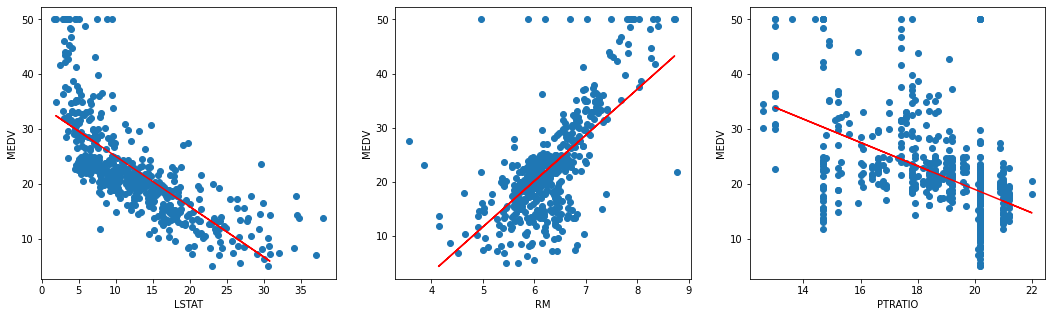

In [30]:
fig = plt.figure(figsize=(18, 5))

ax = fig.add_subplot(131)
ax.scatter(X_LSTAT, Y, marker='o')
ax.plot(X_LSTAT_TEST, PREDICTIONS_LSTAT, color='r')
ax.set_xlabel("LSTAT")
ax.set_ylabel("MEDV")

ax = fig.add_subplot(132)
ax.scatter(X_RM, Y, marker='o')
ax.plot(X_RM_TEST, PREDICTIONS_RM, color='r')
ax.set_xlabel("RM")
ax.set_ylabel("MEDV")

ax = fig.add_subplot(133)
ax.scatter(X_PTRATIO, Y, marker='o')
ax.plot(X_PTRATIO_TEST, PREDICTIONS_PTRATIO, color='r')
ax.set_xlabel("PTRATIO")
ax.set_ylabel("MEDV")



The following diagrams illustrate the relationship between the real target variables and the values that were predicted by the 3 respective models.


Text(0, 0.5, 'Predicted Prices')

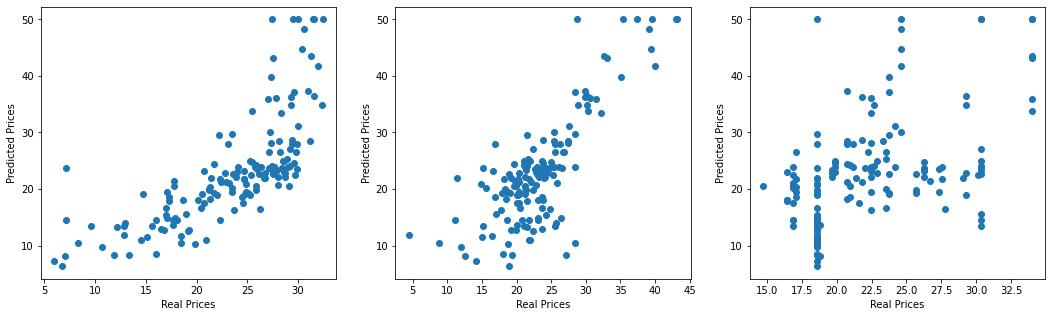

In [17]:
fig = plt.figure(figsize=(18, 5))

ax = fig.add_subplot(131)
ax.scatter(PREDICTIONS_LSTAT, Y_LSTAT_TEST, marker='o')
ax.set_xlabel("Real Prices")
ax.set_ylabel("Predicted Prices")

ax = fig.add_subplot(132)
ax.scatter(PREDICTIONS_RM, Y_RM_TEST, marker='o')
ax.set_xlabel("Real Prices")
ax.set_ylabel("Predicted Prices")

ax = fig.add_subplot(133)
ax.scatter(PREDICTIONS_PTRATIO, Y_PTRATIO_TEST, marker='o')
ax.set_xlabel("Real Prices")
ax.set_ylabel("Predicted Prices")


In the following table we summarize the aforementioned performance evaluation and we present the produced results. The displayed tabular form is achieved by importing the [pandas](https://pandas.pydata.org/) library. [Pandas](https://pandas.pydata.org/) is a Python library for organizing data in a tabular structure, similarly to how databases work. We will present the core elements of [pandas](https://pandas.pydata.org/) in a future notebook.


In [18]:
# RESULTS
str_1 = "y=" + str(round(LM_MODEL_LSTAT.coef_[0], 2)) + "x + " + str(round(LM_MODEL_LSTAT.intercept_, 2))
str_2 = "y=" + str(round(LM_MODEL_RM.coef_[0], 2)) + "x + " + str(round(LM_MODEL_RM.intercept_, 2))
str_3 = "y=" + str(round(LM_MODEL_PTRATIO.coef_[0], 2)) + "x + " + str(round(LM_MODEL_PTRATIO.intercept_, 2))

import pandas as pd
data = {'Model':['Model 1', 'Model 2', 'Model 3'],
        'Features':['LSTAT', 'RM', 'PTRATIO'],
        'MSE':[MSE_LSTAT, MSE_RM, MSE_PTRATIO],
        'R^2':[R2_LSTAT, R2_RM, R2_PTRATIO],
        'intercept':[LM_MODEL_LSTAT.intercept_, LM_MODEL_RM.intercept_, LM_MODEL_PTRATIO.intercept_],
        'coefficients':[LM_MODEL_LSTAT.coef_, LM_MODEL_RM.coef_, LM_MODEL_PTRATIO.coef_],
        'line':[str_1, str_2, str_3]
       }

# Create DataFrame
df_results = pd.DataFrame(data)
df_results


,Model,Features,MSE,R^2,intercept,coefficients,line
0,Model 1,LSTAT,42.620243,0.534990,34.221837,[-0.9166916011658559],y=-0.92x + 34.22
1,Model 2,RM,36.517215,0.601577,-30.571032,[8.461091637115892],y=8.46x + -30.57
2,Model 3,PTRATIO,68.414819,0.253557,61.728348,[-2.134748253788446],y=-2.13x + 61.73


## Linear Regression with two input variables

In this subsection we apply Linear Regression on datasets that include two features. In this case we will also train three Linear Regression models by using datasets that derive by forming all the possible pairs of the three aforementioned features. These pairs are:

1. `LSTAT` and `RM`,
2. `LSTAT` and `PTRATIO`
3. `RM` and `PTRATIO`.


### Vizualizing the selected features

At first we plot in a 3-dimensional space the fluctuations of the house prices vs. the input variables of the three models. To create the required plots, we use the [mplot3d](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html) toolkit of `matplotlib`.


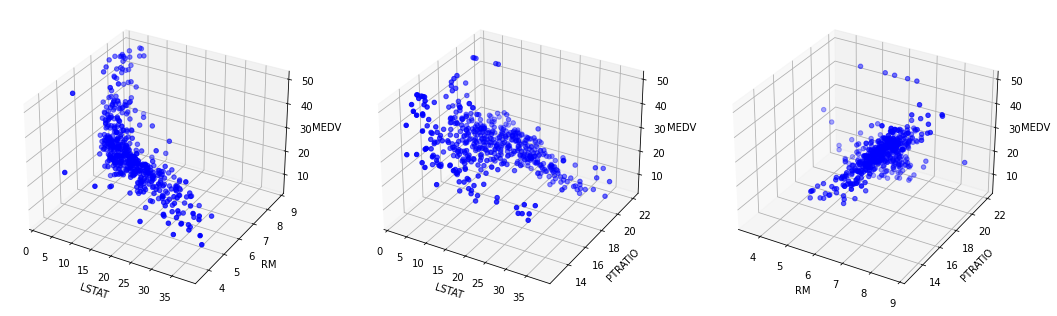

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 18))

# Figure 1 (LSTAT, RM, MEDV)
# XYZ: Number of rows, number of columns, current figure
ax = fig.add_subplot(131, projection = '3d')
ax.scatter(X_LSTAT, X_RM, Y, c='b')

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

# Figure 2 (LSTAT, PTRATIO, MEDV)
ax = fig.add_subplot(132, projection = '3d')
ax.scatter(X_LSTAT, X_PTRATIO, Y, c='b')

ax.set_xlabel("LSTAT")
ax.set_ylabel("PTRATIO")
ax.set_zlabel("MEDV")

# Figure 3 (RM, PTRATIO, MEDV)
ax = fig.add_subplot(133, projection = '3d')
ax.scatter(X_RM, X_PTRATIO, Y, c='b')

ax.set_xlabel("RM")
ax.set_ylabel("PTRATIO")
ax.set_zlabel("MEDV")

plt.show()


### Training and testing the Linear Regression models

Now we train our three additional Linear Regression models as described above. Notice that since in this case we are working with 2 features, we must generate two-column input datasets by concatenating in pairs the previous single-column NumPy arrays `X_LSTAT`, `X_RM`, and `X_PTRATIO`.


In [20]:
'''
X_LSTATRM = np.concatenate((X_LSTAT, X_RM), axis=1)
print("X_LSTAT:")
print(X_LSTAT.shape)
print(X_LSTAT[:5, :])

print("X_RM:")
print(X_RM.shape)
print(X_RM[:5, :])

print("X_LSTATRM:")
print(X_LSTATRM.shape)
print(X_LSTATRM[:5, :])
'''


'\nX_LSTATRM = np.concatenate((X_LSTAT, X_RM), axis=1)\nprint("X_LSTAT:")\nprint(X_LSTAT.shape)\nprint(X_LSTAT[:5, :])\n\nprint("X_RM:")\nprint(X_RM.shape)\nprint(X_RM[:5, :])\n\nprint("X_LSTATRM:")\nprint(X_LSTATRM.shape)\nprint(X_LSTATRM[:5, :])\n'

In [21]:
# Concatenate X_LSTAT and X_RM into a NumPy array with 506 rows and 2 columns
X = np.concatenate((X_LSTAT, X_RM), axis=1)
print("Shape of concatenated list:", X.shape)

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size = 0.3, random_state=1)

LM_MODEL_4 = LinearRegression()
LM_MODEL_4.fit(X_TRAIN, Y_TRAIN)

PREDICTIONS_4 = LM_MODEL_4.predict(X_TEST)

MSE_4 = mean_squared_error(Y_TEST, PREDICTIONS_4)
R2_4 = LM_MODEL_4.score(X_TEST, Y_TEST)

print("Mean Squared Error: ", MSE_4)
print('R-squared: ', R2_4)


Shape of concatenated list: (506, 2)
Mean Squared Error:  28.934491341086556
R-squared:  0.6843090583339466


In [22]:
# Concatenate X_LSTAT and X_PTRATIO into a NumPy array with 506 rows and 2 columns
X = np.concatenate((X_LSTAT, X_PTRATIO), axis=1)
print("Shape of concatenated list:", X.shape)

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size = 0.3, random_state=1)

LM_MODEL_5 = LinearRegression()
LM_MODEL_5.fit(X_TRAIN, Y_TRAIN)

PREDICTIONS_5 = LM_MODEL_5.predict(X_TEST)

MSE_5 = mean_squared_error(Y_TEST, PREDICTIONS_5)
R2_5 = LM_MODEL_5.score(X_TEST, Y_TEST)

print("Mean Squared Error: ", MSE_5)
print('R-squared: ', R2_5)


Shape of concatenated list: (506, 2)
Mean Squared Error:  36.254009952335394
R-squared:  0.6044491535687926


In [23]:
# Concatenate X_RM and X_PTRATIO into a NumPy array with 506 rows and 2 columns
X = np.concatenate((X_RM, X_PTRATIO), axis=1)
print("Shape of concatenated list:", X.shape)

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size = 0.3, random_state=1)

LM_MODEL_6 = LinearRegression()
LM_MODEL_6.fit(X_TRAIN, Y_TRAIN)

PREDICTIONS_6 = LM_MODEL_6.predict(X_TEST)

MSE_6 = mean_squared_error(Y_TEST, PREDICTIONS_6)
R2_6 = LM_MODEL_6.score(X_TEST, Y_TEST)

print("Mean Squared Error: ", MSE_6)
print('R-squared: ', R2_6)


Shape of concatenated list: (506, 2)
Mean Squared Error:  30.90623585904121
R-squared:  0.6627962597759816


### Visualizing the results

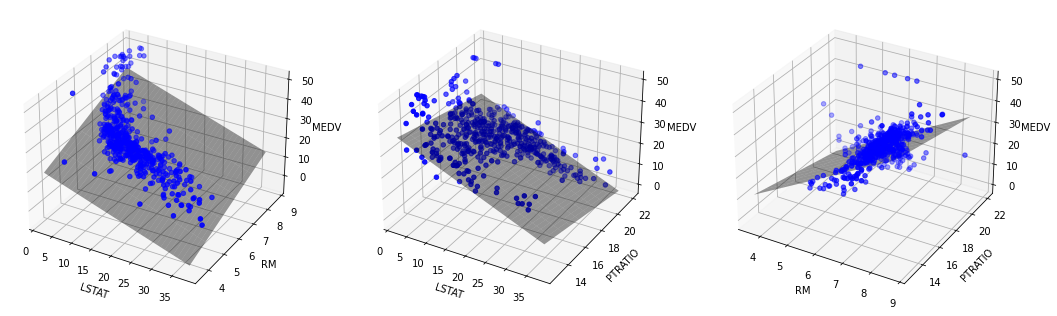

In [24]:
fig = plt.figure(figsize=(18, 18))

# Figure 1 (LSTAT, RM, MEDV)
# XYZ: Number of rows, number of columns, current figure
ax = fig.add_subplot(131, projection = '3d')
ax.scatter(X_LSTAT, X_RM, Y, c='b')

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

x_surf = np.arange(X_LSTAT.min(), X_LSTAT.max(), 1)      # LSTAT
y_surf = np.arange(X_RM.min(), X_RM.max(), 1)            # RM
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

z = lambda x, y: (LM_MODEL_4.intercept_ + LM_MODEL_4.coef_[0] * x + LM_MODEL_4.coef_[1] * y)
ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf), rstride=1, cstride=1, color='None', alpha = 0.4)


# Figure 2 (LSTAT, PTRATIO, MEDV)
ax = fig.add_subplot(132, projection = '3d')
ax.scatter(X_LSTAT, X_PTRATIO, Y, c='b')

ax.set_xlabel("LSTAT")
ax.set_ylabel("PTRATIO")
ax.set_zlabel("MEDV")

x_surf = np.arange(X_LSTAT.min(), X_LSTAT.max(), 1)      # LSTAT
y_surf = np.arange(X_PTRATIO.min(), X_PTRATIO.max(), 1)  # PTRATIO
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

z = lambda x, y: (LM_MODEL_5.intercept_ + LM_MODEL_5.coef_[0] * x + LM_MODEL_5.coef_[1] * y)
ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf), rstride=1, cstride=1, color='None', alpha = 0.4)


# Figure 3 (RM, PTRATIO, MEDV)
ax = fig.add_subplot(133, projection = '3d')
ax.scatter(X_RM, X_PTRATIO, Y, c='b')

ax.set_xlabel("RM")
ax.set_ylabel("PTRATIO")
ax.set_zlabel("MEDV")

x_surf = np.arange(X_RM.min(), X_RM.max(), 1)  # PM
y_surf = np.arange(X_PTRATIO.min(), X_PTRATIO.max(), 1)  # PTRATIO
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

z = lambda x, y: (LM_MODEL_6.intercept_ + LM_MODEL_6.coef_[0] * x + LM_MODEL_6.coef_[1] * y)
ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf), rstride=1, cstride=1, color='None', alpha = 0.4)

plt.show()


In [25]:
# RESULTS
str_4 = "y=" + str(round(LM_MODEL_4.coef_[0], 2)) + "x_1 + " + str(round(LM_MODEL_4.coef_[1], 2)) + "x_2 + " + str(round(LM_MODEL_4.intercept_, 2))
str_5 = "y=" + str(round(LM_MODEL_5.coef_[0], 2)) + "x_1 + " + str(round(LM_MODEL_5.coef_[1], 2)) + "x_2 + " + str(round(LM_MODEL_5.intercept_, 2))
str_6 = "y=" + str(round(LM_MODEL_6.coef_[0], 2)) + "x_1 + " + str(round(LM_MODEL_6.coef_[1], 2)) + "x_2 + " + str(round(LM_MODEL_6.intercept_, 2))

data = {'Model':['Model 4', 'Model 5', 'Model 6'],
        'Features':['LSTAT & RM', 'LSTAT & PTRATIO', 'RM & PTRATIO'],
        'MSE':[MSE_4, MSE_5, MSE_6],
        'R^2':[R2_4, R2_5, R2_6],
        'intercept':[LM_MODEL_4.intercept_, LM_MODEL_5.intercept_, LM_MODEL_6.intercept_],
        'coefficients':[LM_MODEL_4.coef_, LM_MODEL_5.coef_, LM_MODEL_6.coef_],
        'plane':[str_4, str_5, str_6]
       }
  
# Create DataFrame
df_results = pd.DataFrame(data)
df_results


,Model,Features,MSE,R^2,intercept,coefficients,plane
0,Model 4,LSTAT & RM,28.934491,0.684309,5.316818,"[-0.6776265391124414, 4.1267411837946835]",y=-0.68x_1 + 4.13x_2 + 5.32
1,Model 5,LSTAT & PTRATIO,36.254010,0.604449,53.034925,"[-0.7916261661594394, -1.1074750462937029]",y=-0.79x_1 + -1.11x_2 + 53.03
2,Model 6,RM & PTRATIO,30.906236,0.662796,3.006230,"[6.978375010814147, -1.3172740354889492]",y=6.98x_1 + -1.32x_2 + 3.01


## Linear Regression with all input variables

In [26]:
X = np.array(dataset.data)
Y = np.array(dataset.target)

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size = 0.3, random_state=1)

LM_MODEL = LinearRegression()
LM_MODEL.fit(X_TRAIN, Y_TRAIN)

PREDICTIONS = LM_MODEL.predict(X_TEST)

MSE = mean_squared_error(Y_TEST, PREDICTIONS)
R2 = LM_MODEL.score(X_TEST, Y_TEST)

print("Mean Squared Error:", MSE)
print('R-squared:', R2)
print('Intercept:', LM_MODEL.intercept_)
print('Co-efficients:', LM_MODEL.coef_)


Mean Squared Error: 19.831323672063235
R-squared: 0.7836295385076281
Intercept: 46.396493871823864
Co-efficients: [-9.85424717e-02  6.07841138e-02  5.91715401e-02  2.43955988e+00
 -2.14699650e+01  2.79581385e+00  3.57459778e-03 -1.51627218e+00
  3.07541745e-01 -1.12800166e-02 -1.00546640e+00  6.45018446e-03
 -5.68834539e-01]


## Exercises

The [Diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) dataset is another scikit-learn toy dataset for regression problems. It contains 442 samples with 10 features.

1. Apply Linear Regression to the Diabetes dataset using all 10 features.
2. Apply Linear Regression 10 times to the diabetes dataset using only 1 feature each time. Which feature yields the best results (i.e. lowest MSE)?
3. Run LAD Regression on all the examples above
